In [2]:
%pip install qiskit[visualization]==1.1.0
# Use the following if you are on MacOS/zsh
#!pip install 'qiskit[visualization]'==1.1.0
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install prototype-zne

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install qiskit-transpiler-service

Note: you may need to restart the kernel to use updated packages.


In [1]:
%set_env QXToken=your token

env: QXToken=your token


In [5]:
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-i1yogb1t
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-i1yogb1t
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit bcaff898473fd54f3e2668f162817947787f7268
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [6]:
from qc_grader.challenges.qgss_2024 import *
# import of required libraries and modules
from qc_grader.challenges.qgss_2024 import *

from math import pi
from qiskit.circuit.library import QFT
from qiskit.providers.fake_provider import GenericBackendV2, generic_backend_v2
generic_backend_v2._NOISE_DEFAULTS["cx"] = (5.99988e-06, 6.99988e-06, 1e-5, 5e-3)

from qiskit import transpile, QuantumCircuit
from qiskit.circuit import Gate
from qiskit.converters import circuit_to_dag
from qiskit.transpiler import CouplingMap, StagedPassManager, PassManager, AnalysisPass, TransformationPass
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.common import generate_unroll_3q, generate_embed_passmanager
from qiskit.quantum_info import hellinger_fidelity
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.dagcircuit import DAGCircuit
from qiskit_ibm_runtime.fake_provider import FakeTorino

# Transpiler Passes
## Layout passes
from qiskit.transpiler.passes.layout.csp_layout import CSPLayout
from qiskit.transpiler.passes.layout.dense_layout import DenseLayout
from qiskit.transpiler.passes.layout.sabre_layout import SabreLayout
from qiskit.transpiler.passes.layout.vf2_layout import VF2Layout
from qiskit.transpiler.passes.layout.trivial_layout import TrivialLayout

## Routing passes
from qiskit.transpiler.passes.routing.basic_swap import BasicSwap
from qiskit.transpiler.passes.routing.lookahead_swap import LookaheadSwap
from qiskit.transpiler.passes.routing.sabre_swap import SabreSwap
from qiskit.transpiler.passes.routing.stochastic_swap import StochasticSwap
from qiskit.transpiler.passes.routing.star_prerouting import StarPreRouting

## Synthesis passes (passes for the translation stage)
from qiskit.circuit import SessionEquivalenceLibrary
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary
from qiskit.transpiler.passes.basis.basis_translator import BasisTranslator
from qiskit.transpiler.passes.synthesis.high_level_synthesis import HighLevelSynthesis
### The next pass could also be considered an optimization pass.
from qiskit.transpiler.passes.synthesis.unitary_synthesis import UnitarySynthesis

## Optimization passes
from qiskit.transpiler.passes.optimization.collect_1q_runs import Collect1qRuns
from qiskit.transpiler.passes.optimization.collect_2q_blocks import Collect2qBlocks
from qiskit.transpiler.passes.optimization.consolidate_blocks import ConsolidateBlocks
from qiskit.transpiler.passes.optimization.commutative_cancellation import CommutativeCancellation

In [7]:
%set_env QXToken=e627890717d6ea36b41a2db36da0339759001bb21cad25398a8d2c35d61819e7d757af4a46f8500d823f885175b6399377731af3960cab3d76bddccf752232b2

env: QXToken=e627890717d6ea36b41a2db36da0339759001bb21cad25398a8d2c35d61819e7d757af4a46f8500d823f885175b6399377731af3960cab3d76bddccf752232b2


In [8]:
%pip install pandas
%pip install qiskit-ibm-runtime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="e627890717d6ea36b41a2db36da0339759001bb21cad25398a8d2c35d61819e7d757af4a46f8500d823f885175b6399377731af3960cab3d76bddccf752232b2",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

service = QiskitRuntimeService()

In [11]:
available_backends = service.backends()
print("Available backends:", available_backends)

Available backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


In [12]:
# part 1: pick a backend and define 1-D chain
### Your code goes here ###  
# BACKEND 
# PATH_ANSWER = 


# Initialize the Qiskit Runtime Service
service = QiskitRuntimeService()

# Choose a backend (quantum processor)
BACKEND = service.get_backend('ibm_osaka')  # You can choose a different backend if desired

# Define a 1-D chain of qubits
# For example, a chain of 3 qubits connected sequentially
PATH_ANSWER = [0,1,2,3,4]

# grade part 1
from qc_grader.challenges.qgss_2024 import grade_lab2_ex1
grade_lab2_ex1(PATH_ANSWER, BACKEND)

Submitting your answer. Please wait...
Nice work, all your answers look correct!


# Part 2: Define Disjoint Layers

Next, we need to form two sets of edges which correspond to the different layers we will use in benchmarking, say `LAYER_1_ANSWER` and `LAYER_2_ANSWER`, each with type `list[tuple[int, int]]`. These layers should have the following properties:
- Each `LAYER_i_ANSWER` contains edges on distinct sets of qubits, e.g. `(0, 1)` and `(1, 2)` cannot both be in `LAYER_i_ANSWER`, since they both contain `1`.
- Every qubit in `PATH_ANSWER` must be contained in at least one of the `LAYER_i`s.

Answers to grade:
- `LAYER_1_ANSWER: list[tuple[int, int]]`
- `LAYER_2_ANSWER: list[tuple[int, int]]`
- `PATH_ANSWER: list[int]` (same as before)

In [13]:
LAYER_1_ANSWER = [(1,0),(2,3)]
LAYER_2_ANSWER = [(2,1),(3,4)]

In [14]:
from qc_grader.challenges.qgss_2024 import grade_lab2_ex2
grade_lab2_ex2(LAYER_1_ANSWER, LAYER_2_ANSWER, PATH_ANSWER,BACKEND)

Submitting your answer. Please wait...
Nice work, all your answers look correct!


# Part 3: Construct Clifford Entangling Layers
Now we can use the `LAYER_i` from the previous problem to construct the `QuantumCircuit`s for each layer, which we will use for the EPLG experiments. Now it's your job to construct two circuits, `CIRC_1_ANSWER` and `CIRC_2_ANSWER`.
- Each of them should contain a two-qubit Clifford gate for every pair in `LAYER_1_ANSWER` and `LAYER_2_ANSWER` from before.
- The two-qubit Clifford gate (`GATE_NAME`) must be one provided by the backend you choose, i.e. it is in `backend.basis_gates`, should be one of `'ecr'`, `'cz'` or `'cx'` depending on your backend.

Answers to grade:
- `CIRCUIT_1_ANSWER: QuantumCircuit`
- `CIRCUIT_2_ANSWER: QuantumCircuit`
- `LAYER_1_ANSWER: list[tuple[int, int]]` (same as before)
- `LAYER_2_ANSWER: list[tuple[int, int]]` (same as before)
- `GATE_NAME: str`

In [16]:
# Create the first circuit with the gates from LAYER_1_ANSWER
CIRC_1_ANSWER = QuantumCircuit(5)  # Assuming 5 qubits to cover all used qubits
GATE_NAME = 'cx' 
for pair in LAYER_1_ANSWER:
    if GATE_NAME == 'cx':
        CIRC_1_ANSWER.cx(pair[0], pair[1])
    elif GATE_NAME == 'cz':
        CIRC_1_ANSWER.cz(pair[0], pair[1])
    elif GATE_NAME == 'ecr':
        CIRC_1_ANSWER.ecr(pair[0], pair[1])

# Create the second circuit with the gates from LAYER_2_ANSWER
CIRC_2_ANSWER = QuantumCircuit(5)  # Assuming 5 qubits to cover all used qubits
for pair in LAYER_2_ANSWER:
    if GATE_NAME == 'cx':
        CIRC_2_ANSWER.cx(pair[0], pair[1])
    elif GATE_NAME == 'cz':
        CIRC_2_ANSWER.cz(pair[0], pair[1])
    elif GATE_NAME == 'ecr':
        CIRC_2_ANSWER.ecr(pair[0], pair[1])

# Grade part 3
from qc_grader.challenges.qgss_2024 import grade_lab2_ex3
grade_lab2_ex3(CIRC_1_ANSWER, LAYER_1_ANSWER, GATE_NAME, BACKEND)
grade_lab2_ex3(CIRC_2_ANSWER, LAYER_2_ANSWER, GATE_NAME, BACKEND)

Submitting your answer. Please wait...
Nice work, all your answers look correct!
Submitting your answer. Please wait...
Nice work, all your answers look correct!


CIRC_1_ANSWER:


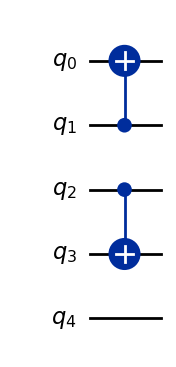

In [18]:
# Visualize the quantum circuits
from qiskit.visualization import plot_coupling_map, circuit_drawer
print("CIRC_1_ANSWER:")
display(circuit_drawer(CIRC_1_ANSWER, output='mpl'))

CIRC_1_ANSWER:


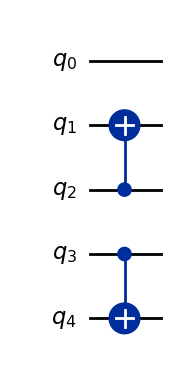

In [19]:
print("CIRC_1_ANSWER:")
display(circuit_drawer(CIRC_2_ANSWER, output='mpl'))

# Part 4: Construct EPLG Experiment Circuits

*No grading for this part*

In this part, we will use the circuits you constructed to construct the total EPLG circuits.  These circuits interleave the layers from before between layers of random Clifford gates.

A few technical asides:
1. There is a slight difference between the circuits constructed here and those defined in the EPLG paper. For a circuit of depth $d$ (for even $d$), we randomly sample 1q Clifford gates for $d/2$ layers,

and then we invert the circuit for the last $d/2$ layers.

This provides a simple implmentation for our purposes, and the details of this difference are beyond the scope of this lab.
2. We perform 1q Clifford sampling by taking advantage of the fact that for backends whose single qubit gates are composed of $R_z(\theta_1) \sqrt{X} R_z(\theta_2) \sqrt{X} R_z(\theta_3)$, when $\theta_i \in \{ \pm \pi / 2, \pm \pi, 0 \}$, the resulting single qubit gate is a Clifford. This allows us to randomly sample 1q Clifford gates simply by changing parameters.

The parameters function is a generator that produces an infinite sequence of unique Parameter objects.


These parameters are used to randomly sample single-qubit Clifford gates. 



The parameters are named in a structured way to keep track of the depth, qubit index, and layer within the depth. 

In [20]:
from qiskit.circuit import Parameter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

def eplg_circuit(num_qubits: int, depth: int, layer: QuantumCircuit, qubits: tuple[int, ...]) -> QuantumCircuit:
    if depth % 2 != 0:
        raise ValueError(f"The depth must be even, got {depth}")

    def parameters():
        _depth = 0
        while True:
            for zi in range(3):
                for q in range(num_qubits):
                    yield Parameter(f"d{_depth}_q{q}_z{zi}")
            _depth += 1
    _parameters = parameters()

    circ = QuantumCircuit(num_qubits)

    def _1q_layer():
        for j in range(3):
            for k in qubits:
                circ.rz(next(_parameters), k)
            if j == 2:
                continue
            circ.sx(qubits)

    for _depth in range(depth // 2):
        circ.barrier(qubits)
        _1q_layer()
        circ.barrier(qubits)
        circ.compose(layer, inplace=True)
    circ.barrier(qubits)
    _1q_layer()
    circ.barrier(qubits)
    
    # Assuming mirroring is fine
    circ = circ.compose(circ.inverse())

    circ.measure_active()

    pm = generate_preset_pass_manager(basis_gates=["ecr", "sx", "rz"], optimization_level=0)
    circ = pm.run(circ)

    circ.metadata["layer_depth"] = depth
    circ.metadata["qubits"] = qubits
    circ.metadata["num_qubits"] = num_qubits

    return circ

Here are examples of the EPLG circuits for depth $d=4$. In a later part we will use this function to construct circuits for varying $d$.

In [21]:
example_circuit_1 = eplg_circuit(
    num_qubits=BACKEND.num_qubits,
    depth=4,
    layer=CIRC_1_ANSWER,
    qubits=PATH_ANSWER,
)

In [22]:
example_circuit_2 = eplg_circuit(
    num_qubits=BACKEND.num_qubits,
    depth=4,
    layer=CIRC_2_ANSWER,
    qubits=PATH_ANSWER,
)

In [24]:
import numpy as np

from qiskit.primitives.containers.bindings_array import BindingsArray

def get_clifford_rz_samples(
    circ: QuantumCircuit,
    num_samples: int,
    rng: np.random.Generator,
) -> BindingsArray:
    """Uniformly sample the Rz parameters in a `QuantumCircuit`
    from -pi, -pi/2, 0, +pi/2, +pi.
    """

    _allowed_ops = {'rz', 'sx', 'sxdg', 'ecr', 'barrier', 'measure'}
    if (_other := set(circ.count_ops().keys()) - _allowed_ops):
        raise ValueError(f"Circuit must only contain ops: {_allowed_ops}, got {_other}")

    sampled_pars = rng.integers(-2, 3, size=(num_samples, len(circ.parameters))) * (np.pi/2)

    return BindingsArray({
        tuple(circ.parameters): sampled_pars
    })

In [25]:
num_samples = 10
ARRAY_1_ANSWER = get_clifford_rz_samples(
    circ=example_circuit_1,
    num_samples=num_samples,
    rng=np.random.default_rng(42))

In [26]:
# grade part 4
from qc_grader.challenges.qgss_2024 import grade_lab2_ex4
grade_lab2_ex4(ARRAY_1_ANSWER, example_circuit_1, num_samples)

Submitting your answer. Please wait...
Nice work, all your answers look correct! 
 Notice that the shape of the BindingsArray is [10], and there are {num_parameters} parameters.


Notice that despite the large number of parameters, the `BindingsArray` has shape `(10,)`, meaning it has `10` entries.

As we discussed before, this is because its elements correspond to sets of parameters and their bound values

# Part 6: Make `ObservablesArray`s

*No grading for this part*

The only remaining thing that we need to produce an `EstimatorPub` is an `ObservablesArray`. The `ObservablesArray` can be seen as a array whose elements are observables. In our case, they will be `SparsePauliOp`s.

In order to calculate the EPLG and LF, we need to calculate the expectation values $\text{Tr}\left( \rho \ket{00}_{i,j}\bra{00}_{i,j}\right)$ and $\text{Tr}\left( \rho \ket{0}_{i}\bra{0}_{i}\right)$ for qubits $i$, $j$ depending on the layers we chose before.

Alternatively we could do this using the `SamplerV2` rather than the `EstimatorV2`. This would come with the tradeoff of having more post-processing that we have to do, but we can have the `EstimatorV2` do this for us by constructing the projectors $\ket{0}_{i}\bra{0}_{i}$ and $\ket{00}_{i,j}\bra{00}_{i,j}$ and using them as observables.

This means that the expectation values we get back from the `EstimatorV2` will be the process fidelities that we're interested in!

In [27]:
import numpy as np
from itertools import product
from qiskit.quantum_info import SparsePauliOp

def process_fidelity_observable(num_qubits: int, qubits: tuple[int, ...]) -> SparsePauliOp:
    """Produces the all 0 projector on `qubits` tensored with the identity on all other qubits"""
    pauli_strings = []

    for p_sub_str in product(["I", "Z"], repeat=len(qubits)):
        p_str = ["I"] * num_qubits
        for qi, pi in zip(qubits, p_sub_str):
            p_str[qi] = pi
        pauli_strings.append("".join(p_str[::-1]))
    
    return SparsePauliOp(pauli_strings, np.ones(len(pauli_strings)) / 2**len(qubits))

Now we need to produce `ObservablesArray`s which correspond to the projectors we are interested in, i.e. the process fidelities for subsets of our path.

In [28]:
from qiskit.primitives.containers.observables_array import ObservablesArray

LAYER_1_SUBSYSTEMS = LAYER_1_ANSWER + [(q,) for q in set(PATH_ANSWER) - set(item for sublist in LAYER_1_ANSWER for item in sublist)]
LAYER_2_SUBSYSTEMS = LAYER_2_ANSWER + [(q,) for q in set(PATH_ANSWER) - set(item for sublist in LAYER_2_ANSWER for item in sublist)]

LAYER_1_OBSERVABLES = ObservablesArray([process_fidelity_observable(BACKEND.num_qubits, qubits) for qubits in LAYER_1_SUBSYSTEMS])
LAYER_2_OBSERVABLES = ObservablesArray([process_fidelity_observable(BACKEND.num_qubits, qubits) for qubits in LAYER_2_SUBSYSTEMS])

Note that the `LAYER_i_OBSERVABLES` have a shape which corresponds to the number of subsystems in each layer.

Since all of the observables in our `ObservablesArray`s are diagonal in the computational basis (i.e. they only consist of Paulis which have $I$ and $Z$ terms), the `EstimatorV2` does not need to compute expectation values in additional bases.

In [29]:
LAYER_1_OBSERVABLES.shape == (len(LAYER_1_SUBSYSTEMS),)
LAYER_2_OBSERVABLES.shape == (len(LAYER_2_SUBSYSTEMS),)

True

# Part 7: Make Sequence of `EstimatorPub`s

*No grading for this part*

Finally, we can construct our `EstimatorPub`s. The [`EstimatorPub`](https://github.com/Qiskit/qiskit/blob/main/qiskit/primitives/containers/estimator_pub.py#L36) is can be seen as a tuple consisting of a `QuantumCircuit`, an `ObservablesArray`, and a `BindingsArray` (and optionally a precision). Given an `EstimatorPub` with a given shape, the `EstimatorV2` will return arrays of expectation values (and their standard deviations) whose shape is the same as the input `EstimatorPub`.

In order to construct the `EstimatorPub`s needed to do the EPLG calculations, we need `EstimatorPub`s which vary in
- the input circuit (i.e. one for each disjoint set of edges) (in our case `2`)
- the depth of the circuit (we have chosen `6` depths here by default).

Therefore, we will have $2 \times 6 = 12$ `EstimatorPub`s total. Within each of these, we have `10` twirling samples, and `k` fidelities (which depends on the path you chose, this should roughly be half of the length of the path). So we have $12$ `EstimatorPub`s, each with $10 k$ elements.

Therefore, the total number of expectation values that we *expect* to receive is $120k$. For a length $30$ chain, $k = 15$, meaning we should roughly $1,800$ expectation values back overall (depending on the edges of the chain).

In [30]:
rng = np.random.default_rng(42)
num_samples = 10
depths = [2, 4, 8, 16, 32, 64]

In [32]:
from qiskit.primitives.containers.estimator_pub import EstimatorPub

estimator_pubs = []
for depth in depths:
    for layer, name, observables in [(CIRC_1_ANSWER, "circ_1", LAYER_1_OBSERVABLES), (CIRC_2_ANSWER, "circ_2", LAYER_2_OBSERVABLES)]:
        circ = eplg_circuit(
            num_qubits=BACKEND.num_qubits,
            depth=depth,
            layer=layer,
            qubits=PATH_ANSWER,
        )
        circ.metadata["layer_idx"] = name
        bindings_array = get_clifford_rz_samples(
            circ=circ,
            num_samples=num_samples,
            rng=rng,
        )

        # We need to reshape the `ObservablesArray`s and `BindingsArray`s so they
        # can be broadcasted.
        # https://numpy.org/doc/stable/user/basics.broadcasting.html#basics-broadcasting
        estimator_pubs.append(EstimatorPub(
            circuit=circ,
            observables=observables.reshape((*observables.shape, 1)),
            parameter_values=bindings_array.reshape((1, *bindings_array.shape)),
        ))

As a sanity check, we can count the number of expectation values we should obtain overall from the shape of the `EstimatorPub`s.

In [33]:
num_evs_expected = 0
for pub in estimator_pubs:
    num_evs_expected += np.prod(estimator_pubs[0].shape)
num_evs_expected

np.int64(360)

# Part 8: Submit to Runtime

*No grading for this part*

Finally, we are ready to hand off our `EstimatorPub`s to the `EstimatorV2`.

Since the calculation of EPLG is SPAM-robust, we should turn off measurement mitigation, which is enabled by default.

In [34]:
from qiskit_ibm_runtime import EstimatorV2
estimator = EstimatorV2(backend=BACKEND)
estimator.options.resilience.measure_mitigation = False

Now we can run the `EstimatorV2` with our `EstimatorPub`s and wait for the result.

With the default settings in this notebook, this should take no more than 10 minutes to complete (not accounting for queue time).

In [35]:
estimator_job = estimator.run(estimator_pubs)

And we can get the `PrimitiveResult` with

In [ ]:
primitive_result = estimator_job.result()

primitive_result

# Part 9: Data Analysis
The final step is to perform the fittings of the decay curves to perform the EPLG analysis.

Let's first grab some of the relevant data from the `PrimitiveResult`.

In [ ]:
data_out = {
    "evs": [pub_res.data.evs for pub_res in primitive_result],
    "stds": [pub_res.data.stds for pub_res in primitive_result],
    "result_metadata": primitive_result.metadata,
    "pub_metadata": [pub_res.metadata for pub_res in primitive_result]
}

Now we can rearrange the expectation values into an array in a convenient form, as well as average over the randomized Cliffords.

In [ ]:
# evs_at_depth is a 
evs_at_depth = np.zeros((len(depths), data_out['evs'][0].shape[0]*2))
for i in range(len(depths)):
    layer1_evs = np.average(data_out['evs'][2*i], axis=-1)
    layer2_evs = np.average(data_out['evs'][2*i+1], axis=-1)
    evs_at_depth[i,:] = np.array([item for pair in zip(layer1_evs, layer2_evs) for item in pair])

The resulting shape has two axes, one for the depth (axis `0`, with shape `6`) and one for the number of subsystem fidelities (axis `1`, dependent on your path).

In [ ]:
evs_at_depth.shape